In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

import os
from glob import glob

from utils.datasets.foscal.patient import FOSCALPatient
from metrics import compute_segmentation_metrics

sns.set_theme()

# Load the data

In [2]:
patients = []
dset_dir = "/data/Datasets/stroke/ISBI_FOSCAL/"
patient_dirs = sorted(glob(os.path.join(dset_dir, "*")))
for patient_dir in patient_dirs:
    patient = FOSCALPatient(patient_dir)
    patients.append(patient)

# Visualize some cases

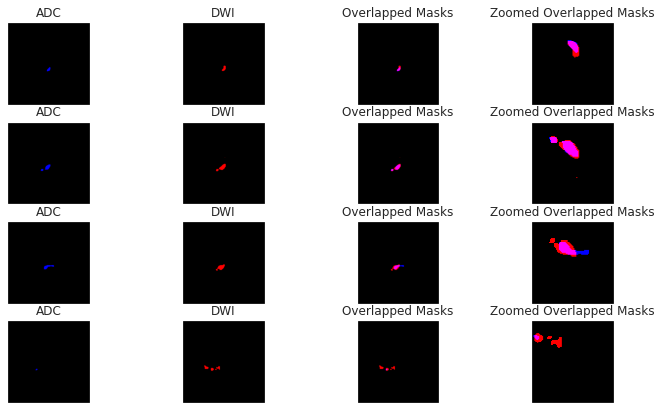

In [3]:
modalities = ["ADC", "DWI"]
normalization = "min_max"
data = patients[3].get_data(modalities=modalities, normalization=normalization)
masks = patients[3].get_mask(modalities=modalities)

suma=masks['ADC'].sum(axis=0)
plots = np.nonzero(suma.sum(axis=0))[0].tolist()

plt.figure(figsize=(12, 7))
N_COLS = 4

for idx, n_plot in enumerate(plots):
    dwi = masks['DWI'][:, :, n_plot]
    adc = masks['ADC'][:, :, n_plot]
    
    red_dwi = np.zeros(shape=(dwi.shape[0], dwi.shape[1], 3))
    blue_adc = np.zeros(shape=(adc.shape[0], adc.shape[1], 3))
    red_dwi[:, :, 0] = dwi[:, :]
    blue_adc[:, :, 2] = adc[:, :]
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 1)
    plt.imshow(blue_adc)
    plt.xticks([])
    plt.yticks([])
    plt.title('ADC')
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 2)
    plt.imshow(red_dwi)
    plt.xticks([])
    plt.yticks([])
    plt.title('DWI')
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 3)
    plt.imshow(blue_adc + red_dwi)
    plt.xticks([])
    plt.yticks([])
    plt.title('Overlapped Masks')
    
    plt.subplot(len(plots), N_COLS, (idx * N_COLS) + 4)
    plt.imshow(blue_adc + red_dwi)
    plt.xlim([int(dwi.shape[0]/3), int(dwi.shape[0]/3) * 2])
    plt.ylim([int(dwi.shape[1]/3), int(dwi.shape[1]/3) * 2])
    plt.xticks([])
    plt.yticks([])
    plt.title('Zoomed Overlapped Masks')
    
plt.show()

## Show statistics

# comparar mascaras de misma modalidad de diferente radiologo

In [4]:
rad_metrics = {}

adc_metrics, dwi_metrics = [], []
for patient in patients:    
    masks_daniel = patient.get_mask(modalities=modalities, radiologist="Daniel")
    masks_andres = patient.get_mask(modalities=modalities, radiologist="Andres")
    adc_metrics.append(compute_segmentation_metrics(masks_daniel["ADC"], masks_andres["ADC"]))
    dwi_metrics.append(compute_segmentation_metrics(masks_daniel["DWI"], masks_andres["DWI"]))

adc_metrics_df = pd.DataFrame(data=adc_metrics)
dwi_metrics_df = pd.DataFrame(data=dwi_metrics)
adc_metrics_df.index.names=['Patient']
dwi_metrics_df.index.names=['Patient']

In [9]:
adc_summary_df = adc_metrics_df.describe()
display(adc_metrics_df)
display(adc_summary_df)

,sens,spec,ppv,npv,dsc,avd,hd
Patient,,,,,,,
0,0.755627,0.999742,0.349183,0.999955,0.477648,0.735772,60.440053
1,0.610913,0.999898,0.747460,0.999807,0.672326,0.201044,102.805642
2,0.427984,0.999990,0.859504,0.999918,0.571440,0.670330,67.609171
3,0.651685,0.999971,0.885496,0.999882,0.750812,0.304207,11.357817
4,0.834352,0.999295,0.865488,0.999099,0.849635,0.036634,5.477226
5,0.206790,0.999981,0.670000,0.999849,0.316054,1.056604,93.380940
6,0.000000,0.999899,0.000000,0.999857,0.000000,0.346793,136.828360
7,0.171114,0.999866,0.564054,0.999161,0.262576,1.068981,84.634508
8,0.428251,0.999815,0.724171,0.999351,0.538219,0.513561,39.610605


,sens,spec,ppv,npv,dsc,avd,hd
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.419266,0.999845,0.579501,0.999645,0.464347,0.493170,57.540766
std,0.295144,0.000213,0.348618,0.000422,0.301867,0.303915,47.625013
min,0.000000,0.999295,0.000000,0.998625,0.000000,0.036634,4.582576
25%,0.180033,0.999828,0.402900,0.999419,0.275945,0.301444,11.455198
50%,0.451198,0.999935,0.710911,0.999853,0.551401,0.405927,50.025329
75%,0.641492,0.999976,0.838727,0.999938,0.671807,0.648901,91.194332
max,0.834352,0.999990,0.973607,0.999986,0.849635,1.068981,137.528179


In [10]:
dwi_summary_df = dwi_metrics_df.describe()
display(dwi_metrics_df)
display(dwi_metrics_df.describe())

,sens,spec,ppv,npv,dsc,avd,hd
Patient,,,,,,,
0,0.000000,0.997627,0.000000,0.998002,0.000000,0.171985,153.993506
1,0.340363,0.999942,0.875158,0.999210,0.490115,0.879944,111.740771
2,0.000000,0.999899,0.000000,0.999826,0.000000,0.529915,73.552702
3,0.762467,0.999893,0.873684,0.999770,0.814296,0.135950,20.000000
4,0.940000,0.999198,0.880803,0.999622,0.909439,0.065023,64.598762
5,0.582656,0.999994,0.955556,0.999910,0.723910,0.484848,6.403124
6,0.786127,0.999989,0.934708,0.999957,0.854005,0.172684,2.236068
7,0.787834,0.999561,0.832848,0.999411,0.809716,0.055550,81.914590
8,0.837395,0.999622,0.750525,0.999779,0.791584,0.109413,47.497368


,sens,spec,ppv,npv,dsc,avd,hd
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.519101,0.999638,0.624413,0.999465,0.557033,0.446054,80.573841
std,0.367075,0.000623,0.414141,0.000589,0.377412,0.542295,53.404110
min,0.000000,0.997627,0.000000,0.998002,0.000000,0.032258,2.236068
25%,0.085091,0.999626,0.187631,0.999260,0.122529,0.116047,48.509550
50%,0.713650,0.999896,0.853266,0.999696,0.788395,0.202229,77.733646
75%,0.787407,0.999958,0.887354,0.999889,0.813151,0.518648,110.978635
max,0.940000,0.999994,0.971185,0.999999,0.909439,1.948052,165.075740


### 1. Metrics for each patient

In [16]:
rad_metrics = {}
for radiologist in tqdm(["Daniel", "Andres"]):
    metrics = []
    for person in patients:    
        masks = person.get_mask(modalities=modalities, radiologist=radiologist)
        metrics.append(compute_segmentation_metrics(masks["DWI"], masks["ADC"]))
    df_metrics = pd.DataFrame(data=metrics)
    df_metrics.index.names=['Patient']
    rad_metrics[radiologist] = df_metrics

**Daniel:** metrics per patient

In [28]:
rad_metrics["Daniel"]

,sens,spec,ppv,npv,dsc,avd,hd
Patient,,,,,,,
0,0.000000,0.999816,0.000000,0.998006,0.000000,1.662964,88.368546
1,0.332026,0.999902,0.803084,0.999200,0.469814,0.829979,12.688578
2,0.000000,0.999857,0.000000,0.999826,0.000000,0.196660,50.950957
3,0.303806,0.999955,0.867041,0.999325,0.449954,0.962099,23.323808
4,0.780812,0.999479,0.904185,0.998620,0.837982,0.146437,68.607580
5,0.517615,0.999922,0.589506,0.999896,0.551233,0.129870,93.407708
6,0.000000,0.999857,0.000000,0.999800,0.000000,0.333895,19.339080
7,0.267274,0.999728,0.731439,0.997969,0.391494,0.929525,15.556349
8,0.709466,0.999828,0.848655,0.999605,0.772844,0.178663,5.916080


**Daniel:** metrics summary

In [29]:
rad_metrics["Daniel"].describe()

,sens,spec,ppv,npv,dsc,avd,hd
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.287858,0.999809,0.454426,0.999163,0.342595,0.699980,60.482875
std,0.294290,0.000187,0.415427,0.000750,0.330292,0.616270,48.412098
min,0.000000,0.999328,0.000000,0.997969,0.000000,0.129870,5.916080
25%,0.000000,0.999819,0.000000,0.998637,0.000000,0.207128,20.335262
50%,0.285540,0.999857,0.660472,0.999288,0.420724,0.365336,54.410751
75%,0.515638,0.999917,0.837262,0.999820,0.591456,0.953956,84.921114
max,0.780812,0.999986,0.904185,0.999999,0.837982,1.833333,187.480666


Text(0.5, 1.0, 'Distibution for Hausdorff Distance (ADC vs DWI)')

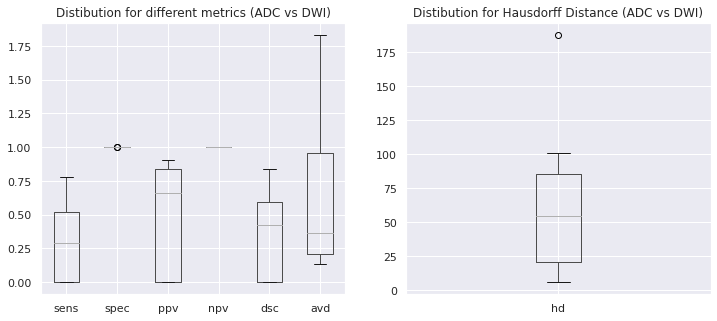

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
rad_metrics["Daniel"][[x for x in rad_metrics["Daniel"].columns if x not in ['hd']]].boxplot(ax=axs[0])
rad_metrics["Daniel"][['hd']].boxplot(ax=axs[1])
axs[0].set_title('Distibution for different metrics (ADC vs DWI)')
axs[1].set_title('Distibution for Hausdorff Distance (ADC vs DWI)')

**Andres:** metrics per patient

In [31]:
rad_metrics["Andres"]

,sens,spec,ppv,npv,dsc,avd,hd
Patient,,,,,,,
0,0.139691,0.999934,0.833581,0.997962,0.239285,1.425890,155.003226
1,0.393443,0.999779,0.452830,0.999718,0.421057,0.140351,72.952039
2,0.476744,0.999977,0.677686,0.999947,0.559742,0.348123,6.000000
3,0.274436,0.999982,0.928753,0.999386,0.423683,1.087638,23.108440
4,0.709570,0.999526,0.909634,0.998049,0.797243,0.247114,44.158804
5,0.382222,0.999992,0.860000,0.999918,0.529245,0.769231,111.628849
6,0.567010,0.999995,0.948276,0.999927,0.709684,0.503226,135.240526
7,0.094555,0.999941,0.806883,0.997628,0.169276,1.580425,70.028566
8,0.395212,0.999927,0.891943,0.999084,0.547731,0.771828,45.011110


**Daniel:** metrics summary

In [32]:
rad_metrics["Andres"].describe()

,sens,spec,ppv,npv,dsc,avd,hd
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.411540,0.999888,0.843516,0.999215,0.529523,0.723795,86.094555
std,0.177403,0.000181,0.147308,0.000870,0.186047,0.436068,55.612801
min,0.094555,0.999444,0.452830,0.997628,0.169276,0.140351,3.162278
25%,0.301383,0.999929,0.813558,0.998420,0.421713,0.398894,44.371881
50%,0.399765,0.999962,0.900789,0.999612,0.538488,0.628561,86.839697
75%,0.507884,0.999993,0.935604,0.999925,0.660687,1.008685,136.398508
max,0.709570,1.000000,1.000000,0.999980,0.797243,1.580425,158.053788


Text(0.5, 1.0, 'Distibution for Hausdorff Distance (ADC vs DWI)')

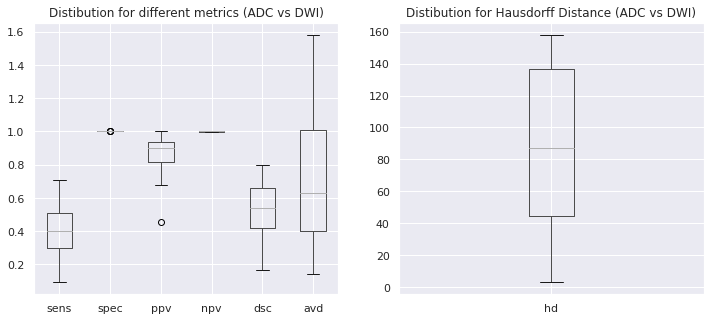

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
rad_metrics["Andres"][[x for x in rad_metrics["Andres"].columns if x not in ['hd']]].boxplot(ax=axs[0])
rad_metrics["Andres"][['hd']].boxplot(ax=axs[1])
axs[0].set_title('Distibution for different metrics (ADC vs DWI)')
axs[1].set_title('Distibution for Hausdorff Distance (ADC vs DWI)')